Lab #3

**A)**

1.
We are looking at a temperature reading that has an expceted reaidng of around 12K but the thermal control system will give us mesurments that are way off and we want to drop those. In this part of the lab we will explore that. 

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
import seaborn as sb
from fractions import Fraction 
import pandas as pd

plt.rcParams["figure.figsize"] = (15,10)

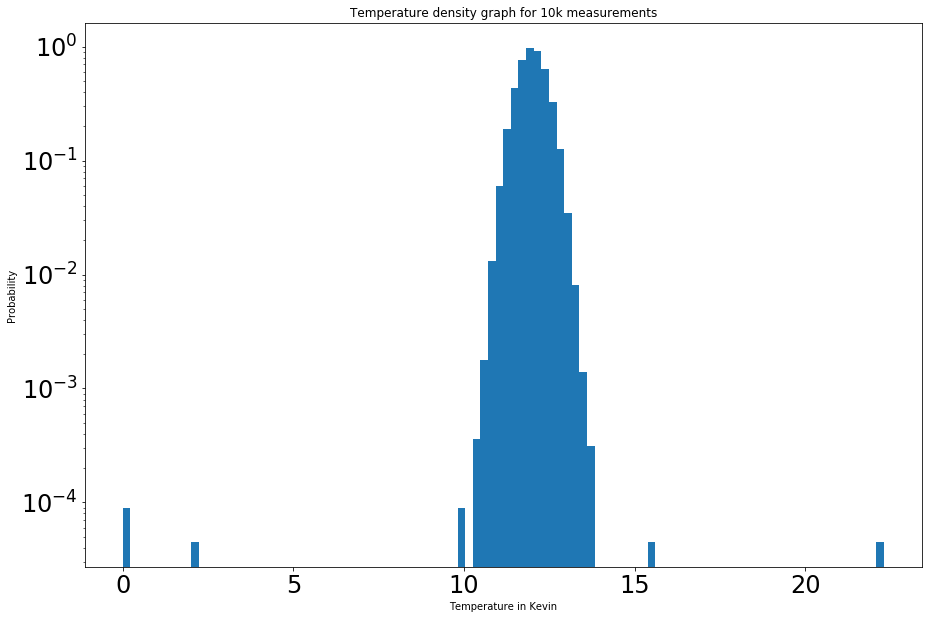

In [3]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.xlabel('Temperature in Kevin')
plt.ylabel('Probability')
plt.title('Temperature density graph for 10k measurements')
plt.tick_params(labelsize = 24)
#plt.legend()
plt.show()

The above show the probability distribution on a semi log scale below we have a graph of just the outliers we want to be removing, as well as a graph of the count of all the temperature readings 

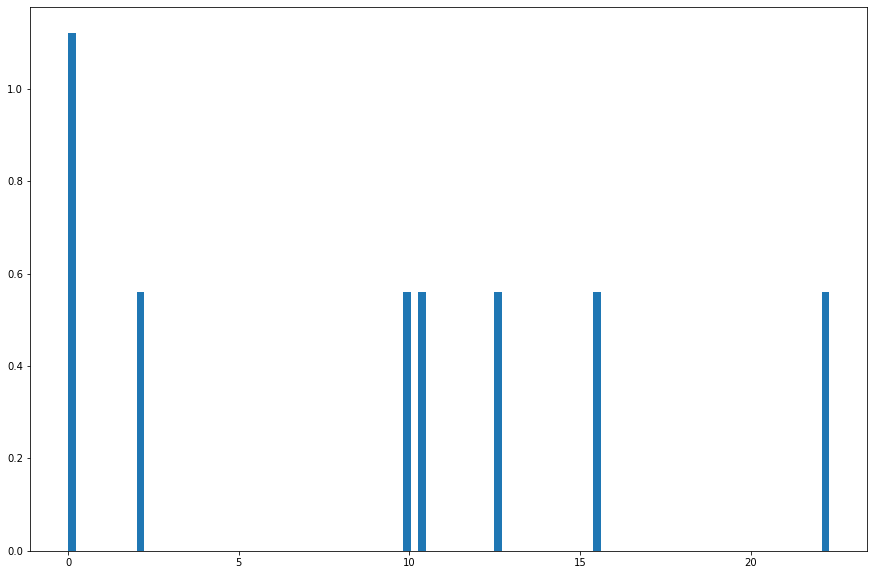

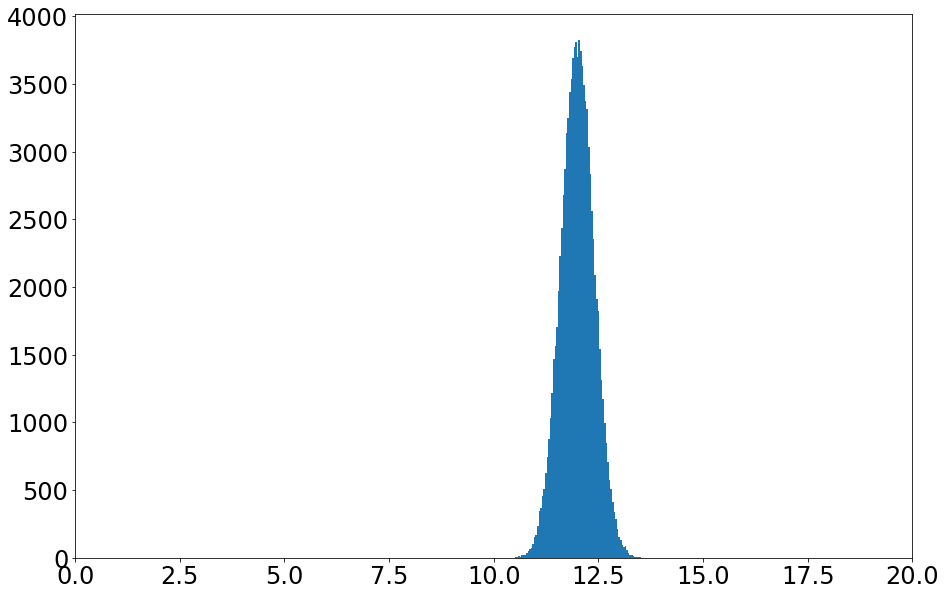

In [4]:
plt.hist([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7],100,density=True)

plt.show()

d =stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
fig, ax = plt.subplots(1, 1)
ax.hist(d,100)
plt.tick_params(labelsize = 24)
plt.xlim([0,20])
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

We can see from the graphs that most of the bad data are outliers but a few do overlap with the good data.

**2.** 
We want to know what is the likelihood that a temperature measurement was produced by an accurate reading and not a misbelieved thermal control system. We want to answered this question because then it will allow us to filter out the data that was not likely to have been produce by an accurate temperature reading. 

**3.**So in math we want to know what is the probably of a measurement being produced by a Gaussian with mean 12 and width 0.4 and we want to do this for each measurement and remove those that are more than some sigma away from the mean.
in math we have
$sigma = |X - 12|/0.4$

**4.**
now we will run the data though this and remove anything that is 4 sigma or more away form the mean. And make a truth tabel with the results of the filtering


In [29]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
d = np.array(d)
sigma = abs(d-12)/0.4
x = {'temp' : d, 'sigma': sigma}


In [57]:
filterdtmp  =temp[temp['sigma'] > 4]

tT = [9995,5]
bT = [1,7]
cat = ['Your Test Good', 'Your Test Bad']
x = {'4 sigma':cat,'True T' : tT, 'Bad T': bT,}
tTable1 = pd.DataFrame(x)
tTable1.set_index('4 sigma')
#filterdtmp

,True T,Bad T
4 sigma,,
Your Test Good,9995,1
Your Test Bad,5,7


In [56]:
filterdtmp  =temp[temp['sigma'] > 4.5]

tT = [1000000,0]
bT = [2,6]
cat = ['Your Test Good', 'Your Test Bad']
x = {'4.5 sigma':cat,'True T' : tT, 'Bad T': bT,}
tTable2 = pd.DataFrame(x)
tTable2.set_index('4.5 sigma')


,True T,Bad T
4.5 sigma,,
Your Test Good,1000000,2
Your Test Bad,0,6


**B)**
Since we are dealing with a Gaussian distributed data set the number of emotions of good data is quite simple to calculate, 1 sigma would give us $12%$% of the good data being omitted at 2 sigma we will see $5$% being omitted and so forth, in general we can use a Z table to see how much data is being omitted

**C)** At our 4 sigma filter we are able to remove all but one of the bad data points, that one bad data point is too close to the mean to be able to remove without cutting out a good deal of good data. Generally bad data getting in is not because we would need to be filtering at 1.75 sigma which would cut more than 8% of the good data which can be significant. As always it is a trade off


**2.**
For part 2 we are going to be looking at asteroids moving thought the sky. In order to do this we need to explore what background events might look as if something in the sky is moving, the main source of this would be stars seeming to move due to astrometric and instrumental effects, below we have plotted the expected distribution for what we expect to get form a displacement of a stations star when comparing subsequent images


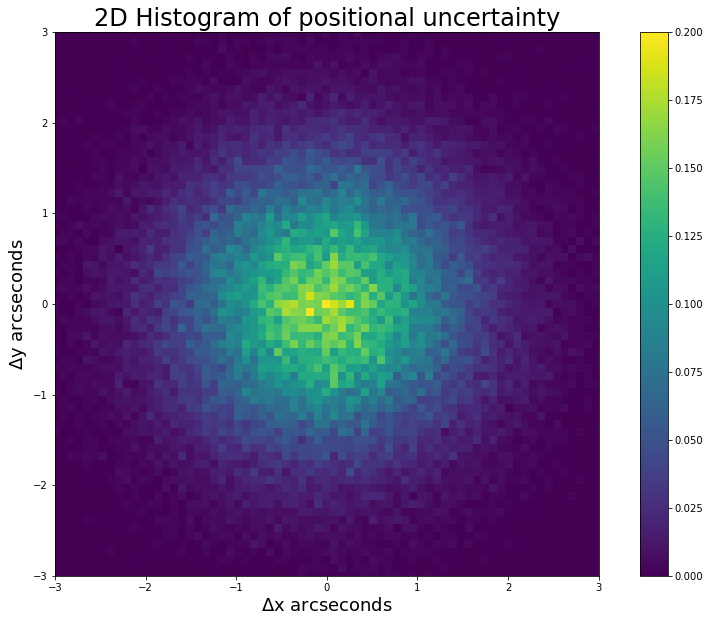

In [92]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

**1.** What we want to know is if we get a measurement for an object moving in the sky what is the probability of it being a stationary star. So that we can compare it to our five sigma standard for a discovery.

**2.** Since we care only about the magnitude of the displacement we can use a Rayleigh with scale 1/arcsececonds for the 2D Gaussian that our background signal has. What we want to know for what magnitude of displacement in arcsececonds would integrating the tail of the Rayleigh give us a five sigma probability.


**3.**
We calculate that below

In [66]:
p = stats.norm.cdf(5)
s=scipy.stats.rayleigh.ppf(p, loc=0, scale=1)
s

print('In order to get a five sigma measurements we need an object to have moved {0:1.2f} arcsececonds'.format(s))

In order to get a five sigma measurements we need an object to have moved 5.49 arcsececonds


**3.** We want to know if the moon is blockes cosmic rays.

 1.
Our background for cosmic rays in a moon sized patch of sky is a Poisson distributed with a mean rate of 1 ray per second. We want to know is if we look at where the moon is in the sky for 8 hours a day over 15 days and see 6800 cosmic rays what is the probability of the background having produced that number of counts or less. One thing to note about this question is that we are integrating from 0 to 6800 so the left tail from our measurement, this is because we are interested in seeing if the moon is reducing the number of cosmic rays coming from the sky.

 2. 
Our pdf is that of a Poisson. Now since the Poisson is memoryless that is that every cosmic ray is independent form every other cosmic and we don’t have to deal with an trials factor since we are looking at the right place in the sky, we just have a pdf for a Poisson with an average of 7200 events per 7200 minutes and we see 6800 event in this time scale. So, we integrate a Poisson distribution with a scale of 7200 from zero to 6800 to get a probability that we can convert into a sigma 




In [76]:
p = scipy.stats.poisson.cdf(6800, 7200, loc=0)
p
print('We get a {0:1.2f} sigma measurement'.format(stats.norm.ppf(1-p)))

We get a 4.75 sigma mesurment
